In [26]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
plant2_gendf = pd.read_csv('Plant_2_Generation_Data.csv')
plant2_weatdf = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

In [28]:
plant2_gendf.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [29]:
plant2_weatdf.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [30]:
plant2_gendf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [31]:
plant2_weatdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


Converting Datetime column to Datetime type

In [32]:
plant2_gendf['DATE_TIME'] = pd.to_datetime(plant2_gendf['DATE_TIME'], dayfirst=True)
plant2_weatdf['DATE_TIME'] = pd.to_datetime(plant2_weatdf['DATE_TIME'], dayfirst=True)

<ipython-input-32-c28d97a44b20>:1: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  plant2_gendf['DATE_TIME'] = pd.to_datetime(plant2_gendf['DATE_TIME'], dayfirst=True)
<ipython-input-32-c28d97a44b20>:2: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  plant2_weatdf['DATE_TIME'] = pd.to_datetime(plant2_weatdf['DATE_TIME'], dayfirst=True)


In [33]:
merged_data = pd.merge(plant2_gendf, plant2_weatdf.drop(columns=['SOURCE_KEY']), on=['DATE_TIME','PLANT_ID'], how='outer')
merged_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0


In [34]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   PLANT_ID             67698 non-null  int64         
 2   SOURCE_KEY           67698 non-null  object        
 3   DC_POWER             67698 non-null  float64       
 4   AC_POWER             67698 non-null  float64       
 5   DAILY_YIELD          67698 non-null  float64       
 6   TOTAL_YIELD          67698 non-null  float64       
 7   AMBIENT_TEMPERATURE  67698 non-null  float64       
 8   MODULE_TEMPERATURE   67698 non-null  float64       
 9   IRRADIATION          67698 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 5.2+ MB


In [65]:
merged_data.describe()

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,67698,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04,67698.000000,67698.000000,67698.000000
mean,2020-06-01 10:44:33.650625024,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08,27.986756,32.607233,0.229204
min,2020-05-15 00:00:00,4136001.0,0.000000,0.000000,0.000000,0.000000e+00,20.942385,20.265123,0.000000
25%,2020-05-23 21:00:00,4136001.0,0.000000,0.000000,272.750000,1.996494e+07,24.570349,23.685627,0.000000
50%,2020-06-01 23:00:00,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08,26.910352,27.433723,0.018554
75%,2020-06-09 23:30:00,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09,30.912601,40.019036,0.431027
max,2020-06-17 23:45:00,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09,39.181638,66.635953,1.098766
std,NaN,0.0,370.569597,362.112118,2919.448386,7.296678e+08,4.021294,11.226446,0.309365


In [35]:
# Specify the file path where you want to save the CSV file
file_path = 'merged_data.csv'

# Save the merged DataFrame to a CSV file
df.to_csv(file_path, index=False)

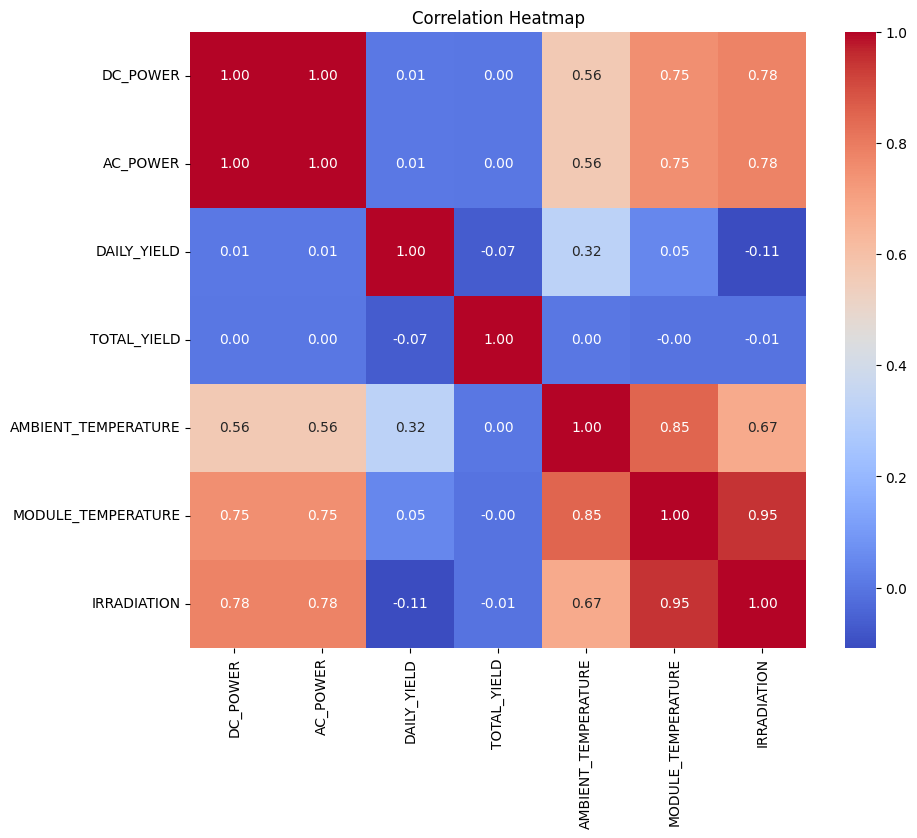

In [51]:
correlation_matrix = df[['DC_POWER','AC_POWER','DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [37]:
print(correlation_matrix)

                     DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
DC_POWER             1.000000  0.999997     0.005593     0.004528   
AC_POWER             0.999997  1.000000     0.005395     0.004533   
DAILY_YIELD          0.005593  0.005395     1.000000    -0.068472   
TOTAL_YIELD          0.004528  0.004533    -0.068472     1.000000   
AMBIENT_TEMPERATURE  0.563232  0.563324     0.321785     0.002774   
MODULE_TEMPERATURE   0.749676  0.749604     0.046787    -0.004646   
IRRADIATION          0.780978  0.780851    -0.107987    -0.006720   

                     AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
DC_POWER                        0.563232            0.749676     0.780978  
AC_POWER                        0.563324            0.749604     0.780851  
DAILY_YIELD                     0.321785            0.046787    -0.107987  
TOTAL_YIELD                     0.002774           -0.004646    -0.006720  
AMBIENT_TEMPERATURE             1.000000            0.848976     0.

**Average AC Power** based on **Source key(inverters)**

In [69]:
source_key_AC = merged_data.groupby('SOURCE_KEY')['AC_POWER'].mean()
source_key_AC

,AC_POWER
SOURCE_KEY,
4UPUqMRk7TRMgml,271.576886
81aHJ1q11NBPMrL,225.728343
9kRcWv60rDACzjR,239.281783
Et9kgGMDl729KT4,184.230269
IQ2d7wF4YD8zU1Q,279.190055
LYwnQax7tkwH5Cb,192.090443
LlT2YUhhzqhg5Sw,240.110947
Mx2yZCDsyf6DPfv,278.659553
NgDl19wMapZy17u,267.485098


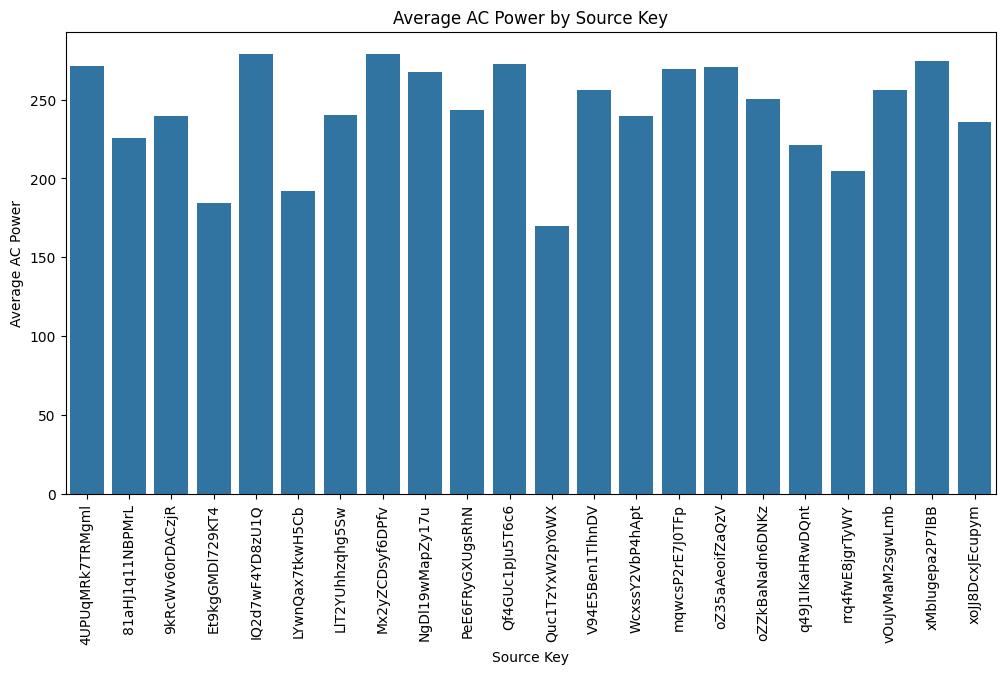

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(x=source_key_AC.index, y=source_key_AC.values)
plt.title('Average AC Power by Source Key')
plt.xlabel('Source Key')
plt.ylabel('Average AC Power')
plt.xticks(rotation=90)
plt.show()

**Average DC Power** based on **Source key(inverters)**

In [77]:
source_key_DC = merged_data.groupby('SOURCE_KEY')['DC_POWER'].mean().reset_index()
source_key_DC

,SOURCE_KEY,DC_POWER
0,4UPUqMRk7TRMgml,277.760524
1,81aHJ1q11NBPMrL,230.796317
2,9kRcWv60rDACzjR,244.653027
3,Et9kgGMDl729KT4,188.230376
4,IQ2d7wF4YD8zU1Q,285.525112
5,LYwnQax7tkwH5Cb,196.286078
6,LlT2YUhhzqhg5Sw,245.493296
7,Mx2yZCDsyf6DPfv,285.013230
8,NgDl19wMapZy17u,273.522084
9,PeE6FRyGXUgsRhN,248.689407


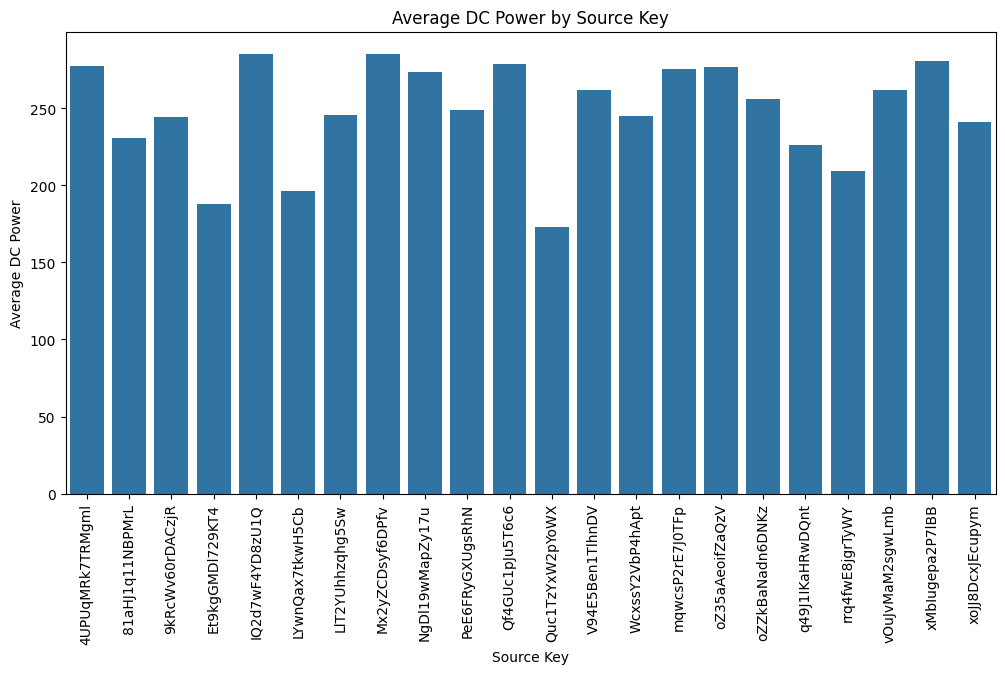

In [78]:
plt.figure(figsize=(12, 6))
sns.barplot(x=source_key_DC['SOURCE_KEY'], y=source_key_DC['DC_POWER'])
plt.title('Average DC Power by Source Key')
plt.xlabel('Source Key')
plt.ylabel('Average DC Power')
plt.xticks(rotation=90)
plt.show()

In [76]:
source_key_yield = merged_data.groupby('SOURCE_KEY').agg({
    'DAILY_YIELD':'mean',
    'TOTAL_YIELD':'mean'
    }).reset_index()
source_key_yield

,SOURCE_KEY,DAILY_YIELD,TOTAL_YIELD
0,4UPUqMRk7TRMgml,4143.422728,2.526560e+06
1,81aHJ1q11NBPMrL,2640.050635,1.126850e+09
2,9kRcWv60rDACzjR,2793.966510,2.215144e+09
3,Et9kgGMDl729KT4,2356.332188,1.773121e+06
4,IQ2d7wF4YD8zU1Q,4116.486644,1.991098e+07
5,LYwnQax7tkwH5Cb,2559.308704,1.782418e+09
6,LlT2YUhhzqhg5Sw,3180.399037,2.806467e+08
7,Mx2yZCDsyf6DPfv,3809.920359,2.559824e+06
8,NgDl19wMapZy17u,3982.965735,1.106542e+08
9,PeE6FRyGXUgsRhN,3319.507937,1.337652e+09


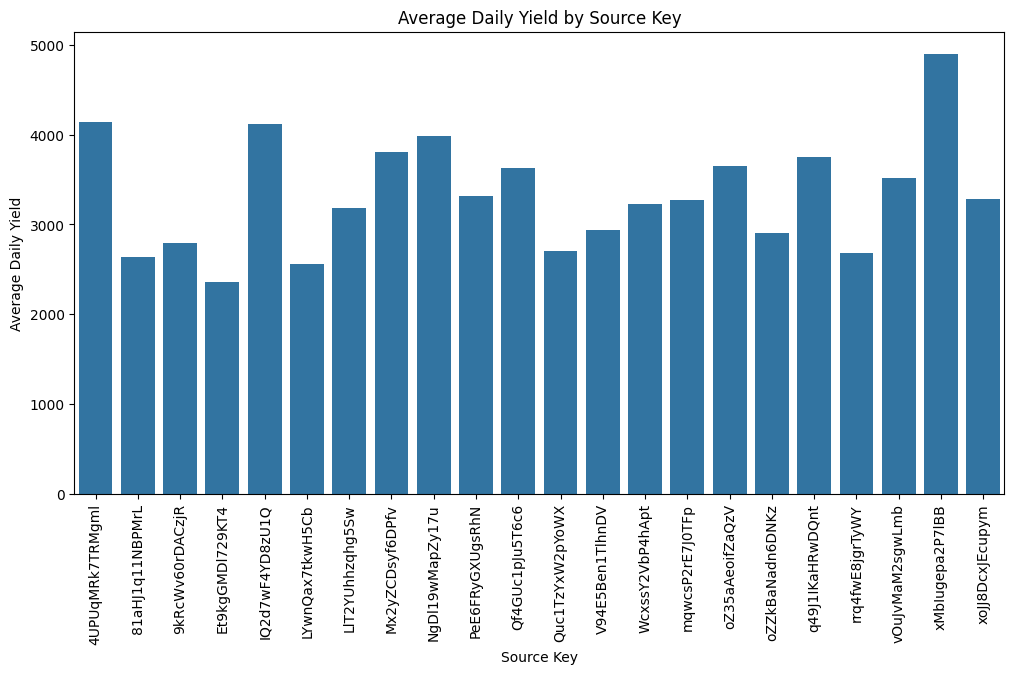

In [80]:
## Source key and Daily Yield
plt.figure(figsize=(12, 6))
sns.barplot(x=source_key_yield['SOURCE_KEY'], y=source_key_yield['DAILY_YIELD'])
plt.title('Average Daily Yield by Source Key')
plt.xlabel('Source Key')
plt.ylabel('Average Daily Yield')
plt.xticks(rotation = 90)
plt.show()

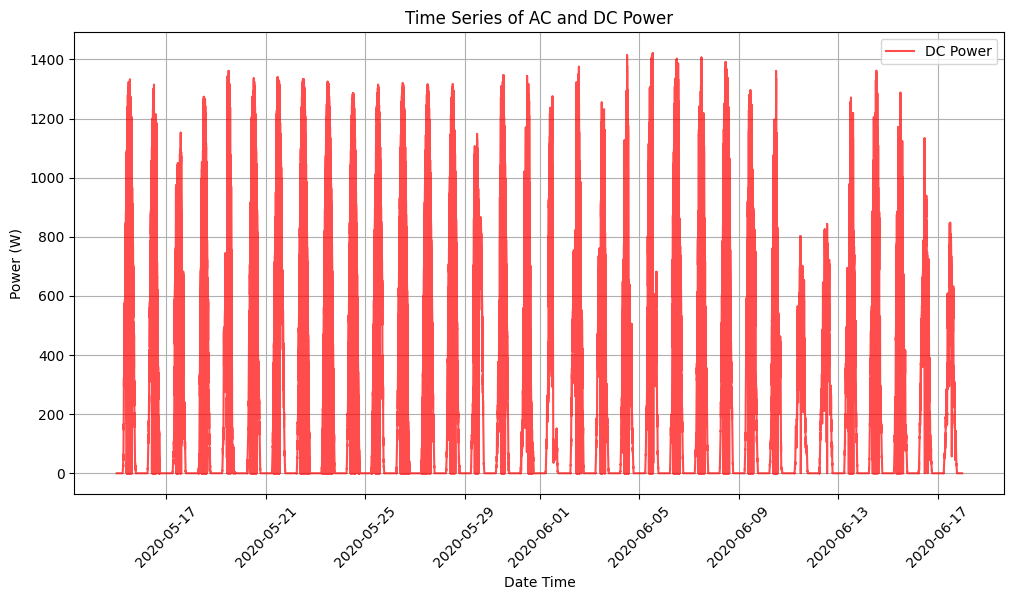

In [47]:
plt.figure(figsize=(12, 6))
# plt.plot(merged_data['DATE_TIME'], merged_data['AC_POWER'], label='AC Power', color='red', alpha=0.7)
plt.plot(merged_data['DATE_TIME'], merged_data['DC_POWER'], label='DC Power', color='red', alpha=0.7)
plt.title('Time Series of AC and DC Power')
plt.xlabel('Date Time')
plt.ylabel('Power (W)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

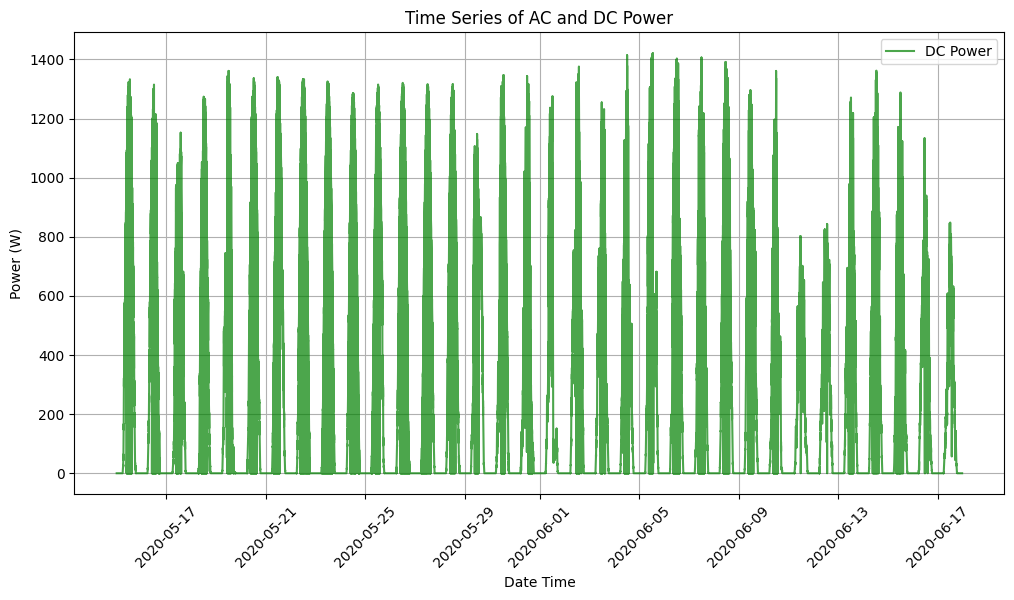

In [81]:

plt.figure(figsize=(12, 6))
# plt.plot(merged_data['DATE_TIME'], merged_data['AC_POWER'], label='AC Power', color='red', alpha=0.7)
plt.plot(merged_data['DATE_TIME'], merged_data['DC_POWER'], label='DC Power', color='green', alpha=0.7)
plt.title('Time Series of AC and DC Power')
plt.xlabel('Date Time')
plt.ylabel('Power (W)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Daily Average yield vs Temperature

In [48]:
# Calculate daily averages for temperature and yield
daily_avg = merged_data.groupby(merged_data['DATE_TIME'].dt.date).agg({
    'DAILY_YIELD': 'mean',
    'AMBIENT_TEMPERATURE': 'mean',
    'MODULE_TEMPERATURE': 'mean'
}).reset_index()

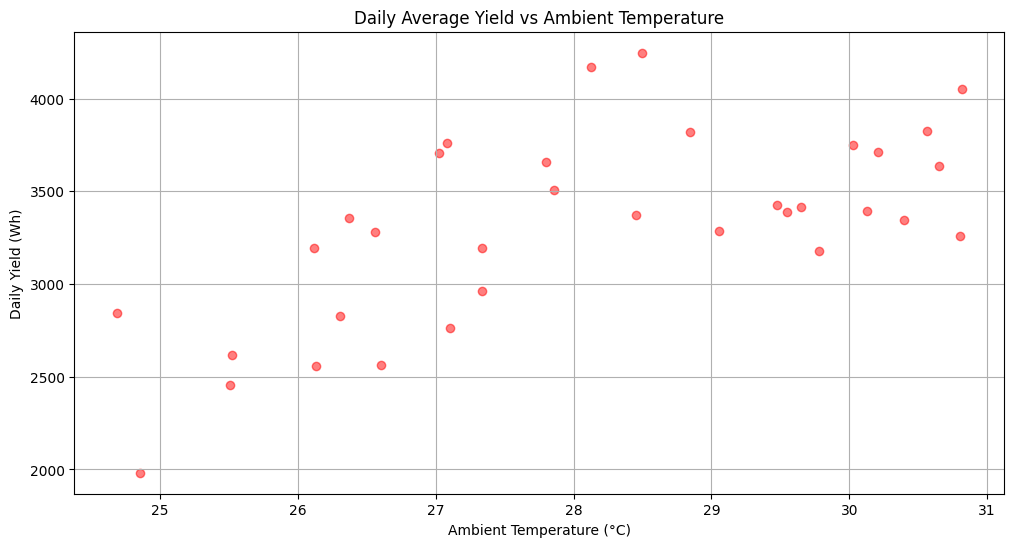

In [50]:
plt.figure(figsize=(12, 6))
plt.scatter(daily_avg['AMBIENT_TEMPERATURE'], daily_avg['DAILY_YIELD'], color='red', alpha=0.5)
plt.title('Daily Average Yield vs Ambient Temperature')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Daily Yield (Wh)')
plt.grid()
plt.show()

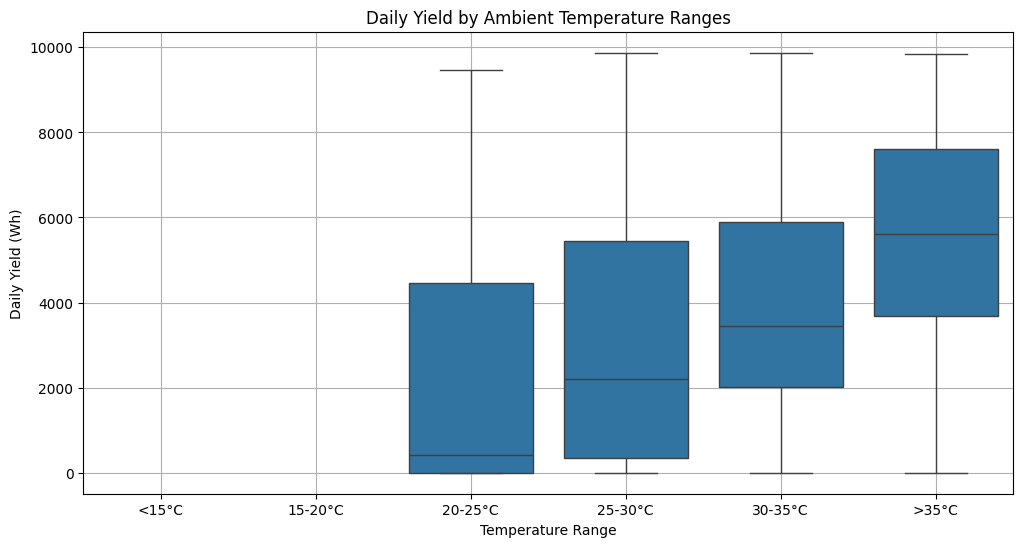

In [52]:
# Create temperature ranges
bins = [0, 15, 20, 25, 30, 35, 40]
labels = ['<15°C', '15-20°C', '20-25°C', '25-30°C', '30-35°C', '>35°C']
merged_data['TEMP_RANGE'] = pd.cut(merged_data['AMBIENT_TEMPERATURE'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
sns.boxplot(x='TEMP_RANGE', y='DAILY_YIELD', data=merged_data)
plt.title('Daily Yield by Ambient Temperature Ranges')
plt.xlabel('Temperature Range')
plt.ylabel('Daily Yield (Wh)')
plt.grid()
plt.show()

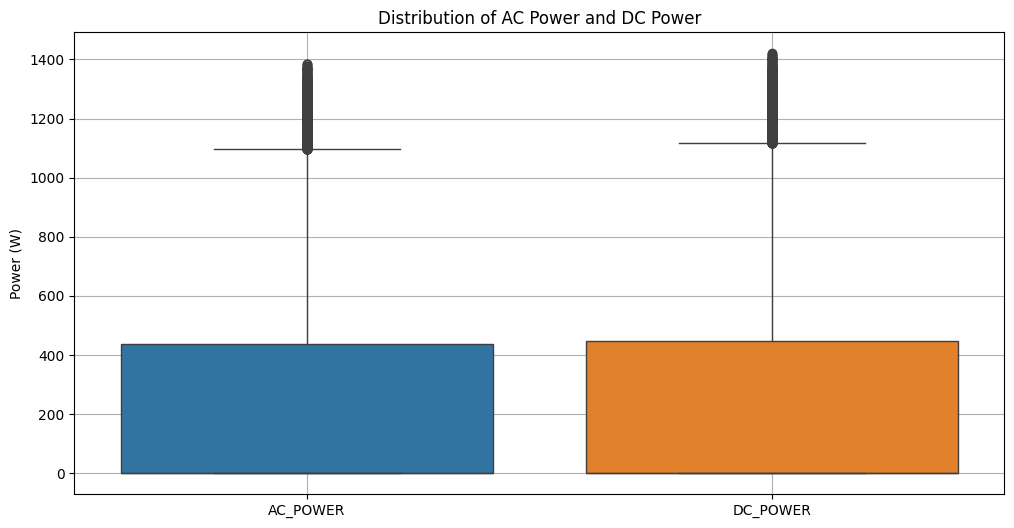

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data[['AC_POWER', 'DC_POWER']])
plt.title('Distribution of AC Power and DC Power')
plt.ylabel('Power (W)')
plt.xticks(ticks=[0, 1], labels=['AC_POWER', 'DC_POWER'])
plt.grid()
plt.show()

In [61]:
Date = merged_data['DATE_TIME'].dt.date
daily_total_yield = merged_data.groupby(Date)['TOTAL_YIELD'].sum()

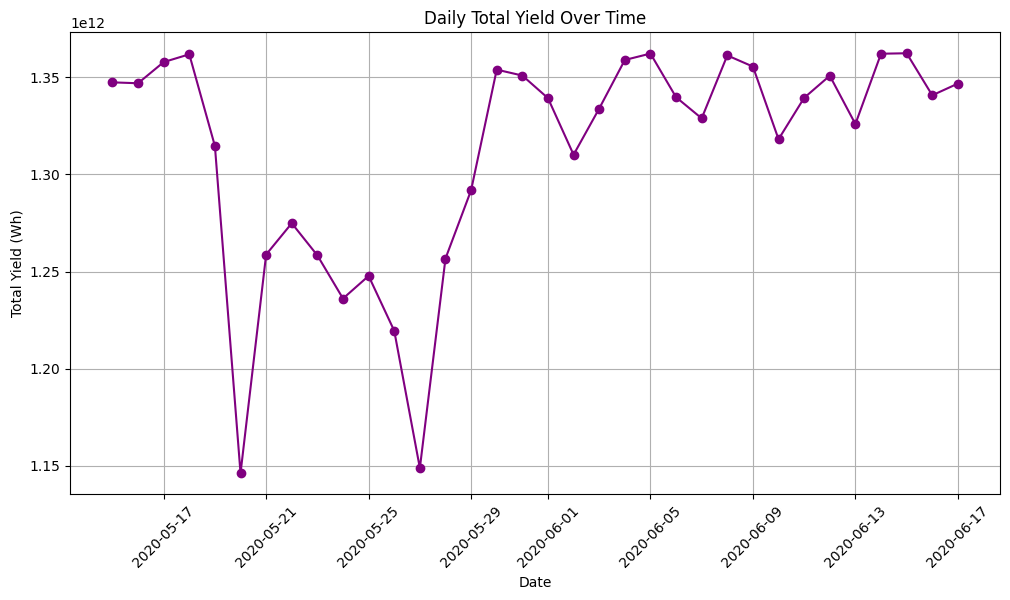

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(daily_total_yield.index, daily_total_yield.values, marker='o', color='purple')
plt.title('Daily Total Yield Over Time')
plt.xlabel('Date')
plt.ylabel('Total Yield (Wh)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

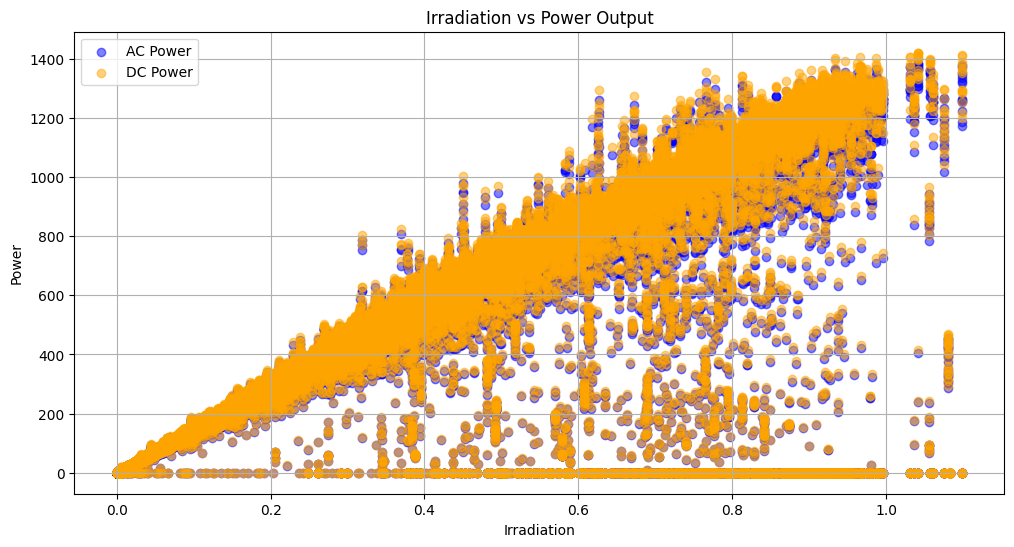

In [63]:
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['IRRADIATION'], merged_data['AC_POWER'], alpha=0.5, label='AC Power', color='blue')
plt.scatter(merged_data['IRRADIATION'], merged_data['DC_POWER'], alpha=0.5, label='DC Power', color='orange')
plt.title('Irradiation vs Power Output')
plt.xlabel('Irradiation')
plt.ylabel('Power')
plt.legend()
plt.grid()
plt.show()